In [1]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statistics as stat
import pandas as pd

In [2]:
spark = SparkSession.builder.appName("appSpark").getOrCreate()

23/07/12 20:21:28 WARN Utils: Your hostname, debian resolves to a loopback address: 127.0.1.1; using 192.168.0.143 instead (on interface eno1)
23/07/12 20:21:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/12 20:21:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
def read_csv(path):
    return spark.read.format("csv")\
            .option("inferSchema", True)\
            .option("header", True)\
            .option("sep", ",")\
            .load(path)

In [4]:
file = "./csv/ile_2019_2021.csv"

In [157]:
ile_df = read_csv(file)
#ile_df.show(10, False)

In [6]:
ile_df.printSchema()

root
 |-- anio: integer (nullable = true)
 |-- mes: string (nullable = true)
 |-- fecha_ingreso: date (nullable = true)
 |-- referida: string (nullable = true)
 |-- estado_civil: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- institucion_derechohab: string (nullable = true)
 |-- nivel_edu: string (nullable = true)
 |-- ocupacion: string (nullable = true)
 |-- religion: string (nullable = true)
 |-- parentesco: string (nullable = true)
 |-- entidad: string (nullable = true)
 |-- alcaldia: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- edad_primera_menstruacion: string (nullable = true)
 |-- edad_inicio_vida_sexual: string (nullable = true)
 |-- fecha_ultima_menstruacion: string (nullable = true)
 |-- semanas_embarazo: string (nullable = true)
 |-- numero_hijos: string (nullable = true)
 |-- numero_embarazos: string (nullable = true)
 |-- numero_abortos: string (nullable = true)
 |-- numero_partos: string (nullable = true)
 |-- numero_cesareas:

In [158]:
ile_df = ile_df.groupby("edad").count().orderBy(col("edad"))

In [159]:
ile_df = ile_df.toPandas()

In [160]:
ile_df

,edad,count
0,11,1
1,12,7
2,13,46
3,14,147
4,15,285
5,16,485
6,17,649
7,18,1424
8,19,2088
9,20,2504


In [25]:
ile_df.describe()

,edad,count
count,43.000000,43.000000
mean,32.116279,899.720930
std,12.758208,945.367737
min,11.000000,1.000000
25%,21.500000,42.500000
50%,32.000000,559.000000
75%,42.500000,1528.000000
max,56.000000,2761.000000


In [174]:
ile_df = pd.DataFrame({'edad': [20, 30, 40, 50], 'count': [5,10,15,22]})

In [175]:
edad = ile_df['edad']
count = ile_df['count']

In [176]:
mean_edad = np.average(edad)
mean_count = np.average(count)
max_count = np.max(count)
min_count = np.min(count)

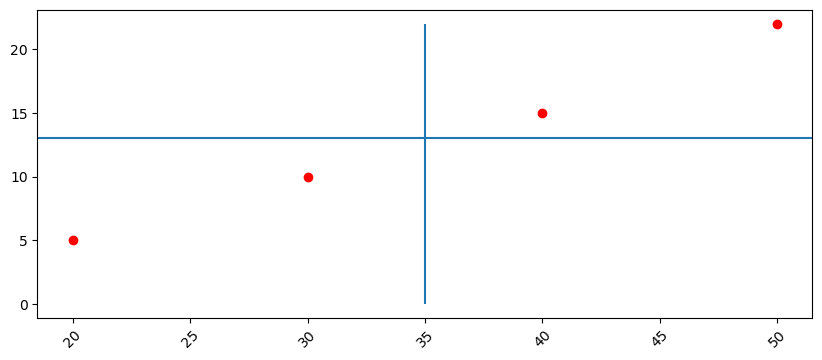

In [177]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 4]

ax.plot(edad, count, 'ro')

#plt.axhline(max)
plt.axhline(mean_count)
#plt.axhline(min)
plt.vlines(mean_edad,0, max_count)
#plt.axhline(np.median(d2))
#plt.axhline(stat.mode(d2))

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xticks(rotation=45)
plt.show()

In [184]:
def varianza_edad(edad):
    return edad - mean_edad
def varianza_count(count):
    return count - mean_count
def covarianza(varianza_edad, count):
    return varianza_edad*count
def varianza_edad_cuadrada(varianza_edad):
    return varianza_edad**2
def predicted(b0, b1, edad):
    return B0 + B1 * edad
def diff_error(value, predicted):
    return predicted - value

In [179]:
ile_df['varianza_edad'] = ile_df['edad'].apply(varianza_edad)
ile_df['varianza_count'] = ile_df['count'].apply(varianza_count)
ile_df['covarianza'] = ile_df.apply(lambda e: covarianza(e['varianza_edad'], e['varianza_count']), axis=1)
ile_df['varianza_edad_cuadrada'] = ile_df.apply(lambda e: varianza_edad_cuadrada(e['varianza_edad']), axis=1)

ile_df

,edad,count,varianza_edad,varianza_count,covarianza,varianza_edad_cuadrada
0,20,5,-15.0,-8.0,120.0,225.0
1,30,10,-5.0,-3.0,15.0,25.0
2,40,15,5.0,2.0,10.0,25.0
3,50,22,15.0,9.0,135.0,225.0


In [180]:
sum_covarianza = np.sum(ile_df['covarianza'])
sum_varianza_edad_cuadrada = np.sum(ile_df['varianza_edad_cuadrada'])

B1 = sum_covarianza / sum_varianza_edad_cuadrada
B0 = mean_count - (B1*mean_edad)
y = B0 + B1 * (20)

In [181]:
print(y, B1, B0)

4.6 0.56 -6.600000000000001


In [187]:
ile_df

,edad,count,varianza_edad,varianza_count,covarianza,varianza_edad_cuadrada,predicted_count
0,20,5,-15.0,-8.0,120.0,225.0,4.6
1,30,10,-5.0,-3.0,15.0,25.0,10.2
2,40,15,5.0,2.0,10.0,25.0,15.8
3,50,22,15.0,9.0,135.0,225.0,21.4


In [188]:
ile_df['predicted_count'] = ile_df.apply(lambda e: predicted(B0, B1, e['edad']), axis=1)
ile_df['diff_error'] = ile_df.apply(lambda e: diff_error(e['count'], e['predicted_count']), axis=1)
ile_df['square_error'] = ile_df['diff_error'].apply(lambda e: e**2)
ile_df['old_square_error'] = ile_df['varianza_count'].apply(lambda e: e**2)

In [189]:
ile_df

,edad,count,varianza_edad,varianza_count,covarianza,varianza_edad_cuadrada,predicted_count,diff_error,square_error,old_square_error
0,20,5,-15.0,-8.0,120.0,225.0,4.6,-0.4,0.16,64.0
1,30,10,-5.0,-3.0,15.0,25.0,10.2,0.2,0.04,9.0
2,40,15,5.0,2.0,10.0,25.0,15.8,0.8,0.64,4.0
3,50,22,15.0,9.0,135.0,225.0,21.4,-0.6,0.36,81.0


In [209]:
TSS = np.sum(ile_df['old_square_error'])
TSS

158.0

In [210]:
SSE = np.sum(ile_df['square_error'])
SSE

1.1999999999999986

In [211]:
SSR = TSS - SSE

23/07/13 00:42:01 WARN JavaUtils: Attempt to delete using native Unix OS command failed for path = /tmp/blockmgr-24d7ba42-0daf-4757-bb9b-357b380f6266. Falling back to Java IO way
java.io.IOException: Failed to delete: /tmp/blockmgr-24d7ba42-0daf-4757-bb9b-357b380f6266
	at org.apache.spark.network.util.JavaUtils.deleteRecursivelyUsingUnixNative(JavaUtils.java:177)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:113)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:94)
	at org.apache.spark.util.Utils$.deleteRecursively(Utils.scala:1231)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1(DiskBlockManager.scala:368)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1$adapted(DiskBlockManager.scala:364)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach

In [206]:
SSR

156.8

In [207]:
rsquare_Coefficient_of_determination = SSR / TSS

In [208]:
rsquare_Coefficient_of_determination

0.9924050632911393